In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
glass = pd.read_csv(r"C:\Users\srira\Desktop\Ram\Data science\Course - Assignments\Module 18 - K Nearest neighbour\Dataset\glass.csv")
glass.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [5]:
glass.shape

(214, 10)

In [3]:
def norm(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [11]:
glass_norm = norm(glass.iloc[:,:9])
glass_norm

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [26]:
glass_norm['Type'] = glass.iloc[:,9]
glass_norm

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0,7
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0,7
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0,7
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0,7


In [14]:
#Building train and test data

In [15]:
from sklearn.model_selection import train_test_split

In [27]:
train,test = train_test_split(glass_norm,test_size=0.2)

In [28]:
train.shape

(171, 10)

In [12]:
#Let's build basic model with k=3 then we will build a loop of 50

In [13]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [18]:
neigh_3 = KNC(n_neighbors=3)

In [30]:
neigh_3.fit(train.iloc[:,:9],train.iloc[:,9])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [31]:
train_accuracy = np.mean(neigh_3.predict(train.iloc[:,:9])==train.iloc[:,9])
train_accuracy

0.7894736842105263

In [33]:
test_accuracy = np.mean(neigh_3.predict(test.iloc[:,:9])==test.iloc[:,9])
test_accuracy

0.7674418604651163

In [34]:
#Plotting for ideal K value

In [47]:
accuracy = []

In [48]:
for i in range(3,50,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,:9],train.iloc[:,9])
    train_accuracy = np.mean(neigh.predict(train.iloc[:,:9])==train.iloc[:,9])
    test_accuracy = np.mean(neigh.predict(test.iloc[:,:9])==test.iloc[:,9])
    accuracy.append([train_accuracy,test_accuracy])
accuracy

[[0.7894736842105263, 0.7674418604651163],
 [0.7426900584795322, 0.7209302325581395],
 [0.7134502923976608, 0.627906976744186],
 [0.6666666666666666, 0.6744186046511628],
 [0.6432748538011696, 0.6511627906976745],
 [0.631578947368421, 0.5813953488372093],
 [0.6374269005847953, 0.6511627906976745],
 [0.6257309941520468, 0.627906976744186],
 [0.6081871345029239, 0.6744186046511628],
 [0.6081871345029239, 0.6744186046511628],
 [0.5789473684210527, 0.6976744186046512],
 [0.6023391812865497, 0.627906976744186],
 [0.5789473684210527, 0.6046511627906976],
 [0.6081871345029239, 0.6046511627906976],
 [0.6140350877192983, 0.6976744186046512],
 [0.6140350877192983, 0.6976744186046512],
 [0.5964912280701754, 0.6511627906976745],
 [0.6023391812865497, 0.6744186046511628],
 [0.5847953216374269, 0.6976744186046512],
 [0.5906432748538012, 0.6046511627906976],
 [0.5730994152046783, 0.5116279069767442],
 [0.5730994152046783, 0.5116279069767442],
 [0.5497076023391813, 0.4883720930232558],
 [0.53801169590

In [49]:
len(accuracy)

24

In [38]:
#Plotting the accuracy values to find the best K value

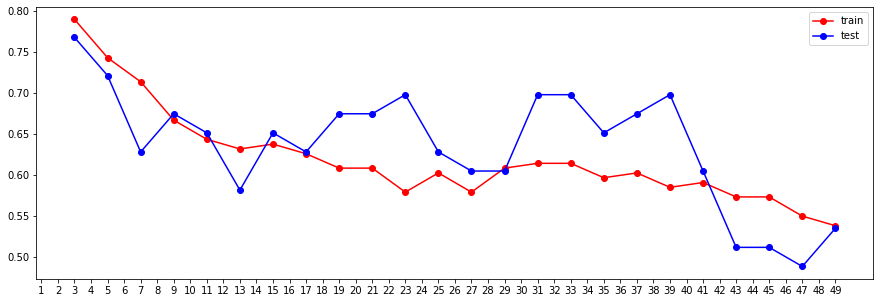

In [51]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(3,50,2),[i[0] for i in accuracy],'ro-');plt.xticks(range(1,50))
plt.plot(np.arange(3,50,2),[i[1] for i in accuracy],'bo-')
plt.legend(["train","test"])
plt.show()

In [ ]:
#Hence the ideal value of K is 3